<a href="https://colab.research.google.com/github/Shiyasalloor/Pneumonia_detection_Fom_chest_X-ray/blob/main/Pneumonia_detection_from_chest_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install the kagglehub package
!pip install kagglehub

# Step 2: Import necessary libraries
import kagglehub
import os

# Step 3: Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

# Step 4: List the contents of the downloaded dataset
print("Contents of the dataset folder:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))

100%|██████████| 2.29G/2.29G [00:21<00:00, 114MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
Contents of the dataset folder:
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/.DS_Store
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/train/.DS_Store
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/train/PNEUMONIA/person464_virus_954.jpeg
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/train/PNEUMONIA/person595_bacteria_2438.jpeg
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/train/PNEUMONIA/person313_bacteria_1457.jpeg
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/train/PNEUMONIA/person82_virus_155.jpeg
/root/.cache/kagglehub/datasets/paultimoth

In [2]:
# Downgrade numpy and pandas to compatible versions
!pip install numpy==1.26.4 pandas==2.2.2

!pip install seaborn tensorflow keras scikit-learn opencv-python

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import os

# Print versions
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("tensorflow:", tf.__version__)

numpy: 1.26.4
pandas: 2.2.2
tensorflow: 2.18.0


In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Load datasets
train_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train'
test_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test'
val_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val'

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

val_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

# Extract data and labels
x_train, y_train = [], []
for images, labels in train_dataset:
    x_train.extend(images.numpy())
    y_train.extend(labels.numpy())

x_test, y_test = [], []
for images, labels in test_dataset:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())

x_val, y_val = [], []
for images, labels in val_dataset:
    x_val.extend(images.numpy())
    y_val.extend(labels.numpy())

# Convert to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

# Verify shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
x_train shape: (5216, 224, 224, 3)
y_train shape: (5216,)
x_test shape: (624, 224, 224, 3)
y_test shape: (624,)
x_val shape: (16, 224, 224, 3)
y_val shape: (16,)


In [5]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [7]:
import numpy as np
import cv2

# Define image size
img_size = 150

# Convert RGB images to grayscale and resize
x_train_gray = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), (img_size, img_size)) for img in x_train])
x_val_gray = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), (img_size, img_size)) for img in x_val])
x_test_gray = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), (img_size, img_size)) for img in x_test])

# Add a channel dimension
x_train_gray = x_train_gray.reshape(-1, img_size, img_size, 1)
x_val_gray = x_val_gray.reshape(-1, img_size, img_size, 1)
x_test_gray = x_test_gray.reshape(-1, img_size, img_size, 1)

# Verify shapes
print("x_train_gray shape:", x_train_gray.shape)
print("x_val_gray shape:", x_val_gray.shape)
print("x_test_gray shape:", x_test_gray.shape)

x_train_gray shape: (5216, 150, 150, 1)
x_val_gray shape: (16, 150, 150, 1)
x_test_gray shape: (624, 150, 150, 1)


In [12]:
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)

x_train shape: (5216, 224, 224, 3)
x_val shape: (16, 224, 224, 3)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Update input_shape to (224, 224, 3) for RGB images
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │      11,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,963,457 (45.64 MB)

 Trainable params: 11,963,457 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Use x_train_gray if grayscale
    epochs=50,
    validation_data=datagen.flow(x_val, y_val)  # Use x_val_gray if grayscale
)

Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 340ms/step - accuracy: 0.7539 - loss: 0.6756 - val_accuracy: 0.5625 - val_loss: 1.8193
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 345ms/step - accuracy: 0.8616 - loss: 0.3082 - val_accuracy: 0.8125 - val_loss: 1.0603
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 334ms/step - accuracy: 0.8822 - loss: 0.2847 - val_accuracy: 0.7500 - val_loss: 1.0958
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 338ms/step - accuracy: 0.8835 - loss: 0.2713 - val_accuracy: 0.5625 - val_loss: 1.3418
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 338ms/step - accuracy: 0.9058 - loss: 0.2344 - val_accuracy: 0.5625 - val_loss: 1.7244
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 340ms/step - accuracy: 0.9003 - loss: 0.2463 - val_accuracy: 0.6250 - val_loss: 1.9470
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 339ms/step - accuracy: 0.9115 - loss: 0.2226 - val_accuracy: 0.6250 - val_loss: 1.5210
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 336ms/step - accuracy: 0.9154 - loss: 0

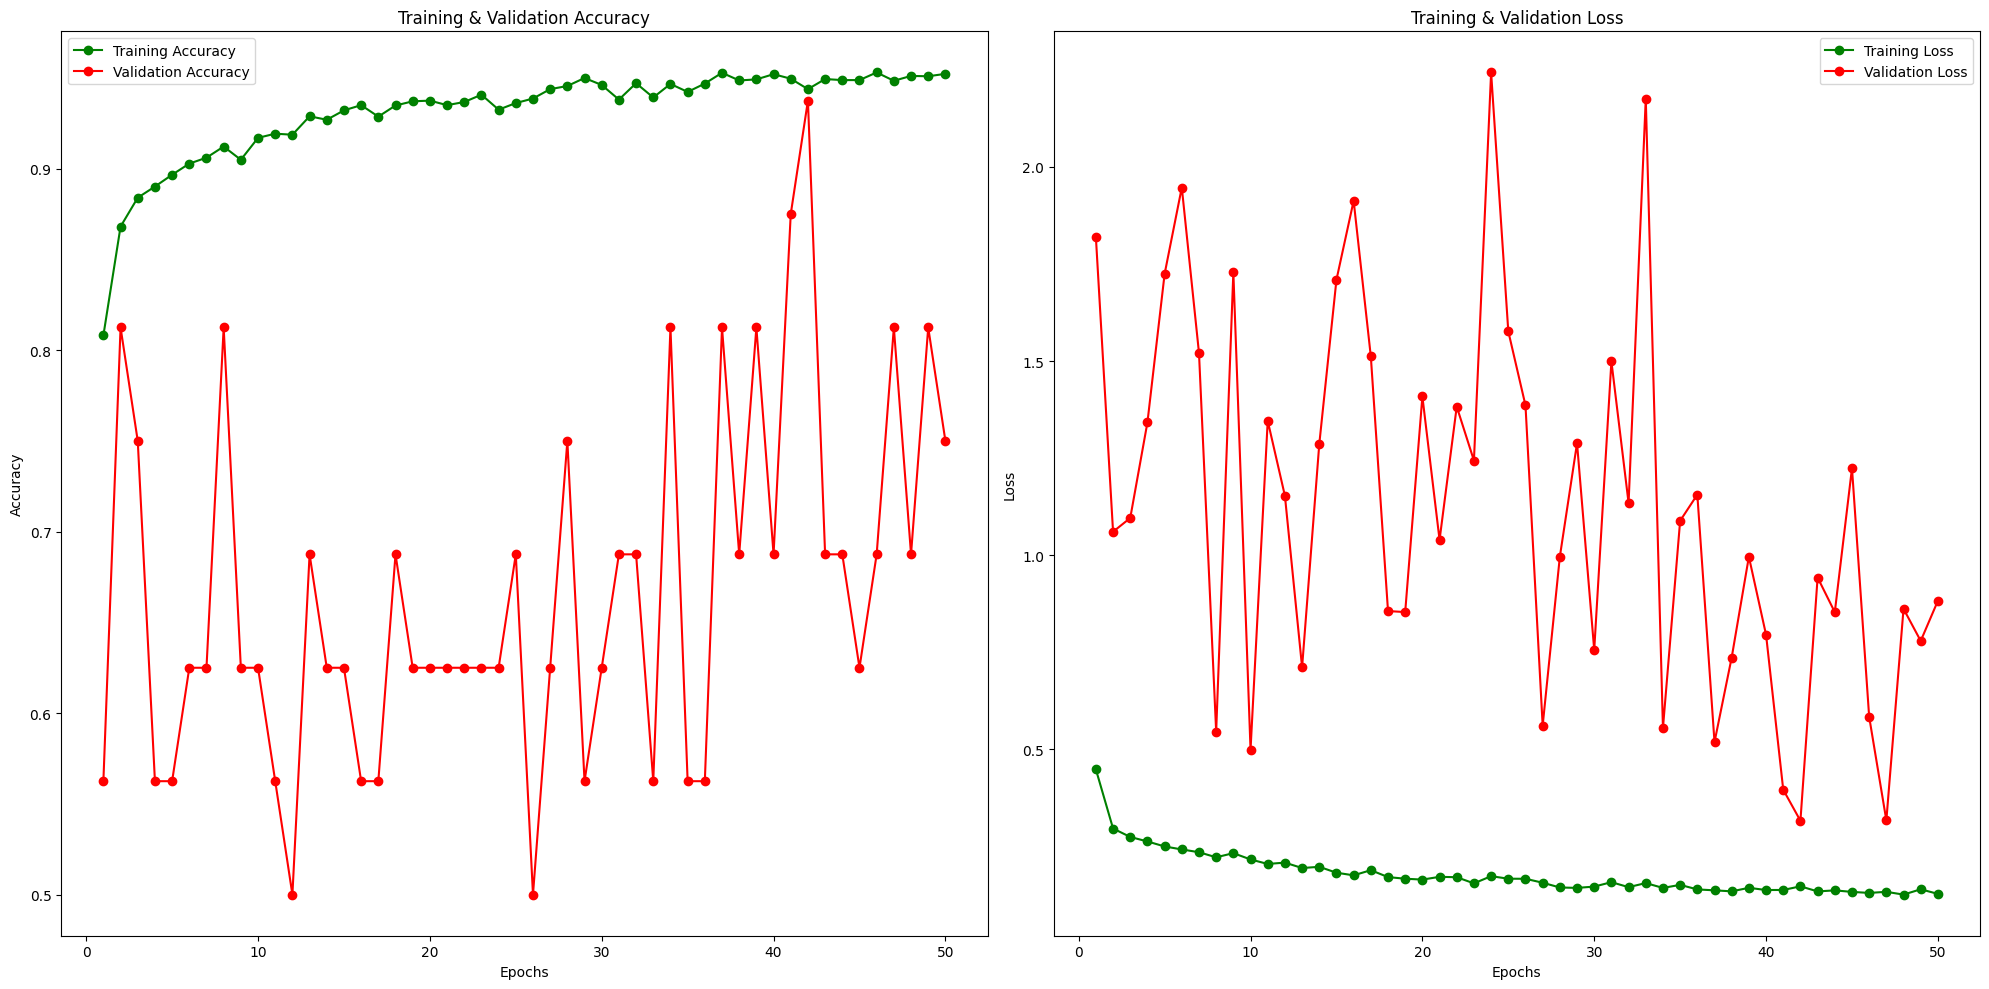

In [16]:
import matplotlib.pyplot as plt

# Extract epochs and metrics
epochs = list(range(1, len(history.history['accuracy']) + 1))

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Create a figure
plt.figure(figsize=(20, 10))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, train_acc, 'go-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, train_loss, 'g-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [18]:
# Get predicted probabilities
y_pred_prob = model.predict(x_test)

# Apply a threshold (e.g., 0.5) to get predicted classes
y_pred = (y_pred_prob > 0.5).astype(int)

# Print predictions
print("Predicted classes:", y_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Predicted classes: [[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 

In [21]:
from sklearn.metrics import classification_report

# Assuming y_pred is already defined
print(classification_report(y_test, y_pred, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.79      0.85       234
   Normal (Class 1)       0.88      0.96      0.92       390

           accuracy                           0.90       624
          macro avg       0.91      0.88      0.89       624
       weighted avg       0.90      0.90      0.90       624



In [23]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred is already defined
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[184  50]
 [ 14 376]]


In [24]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

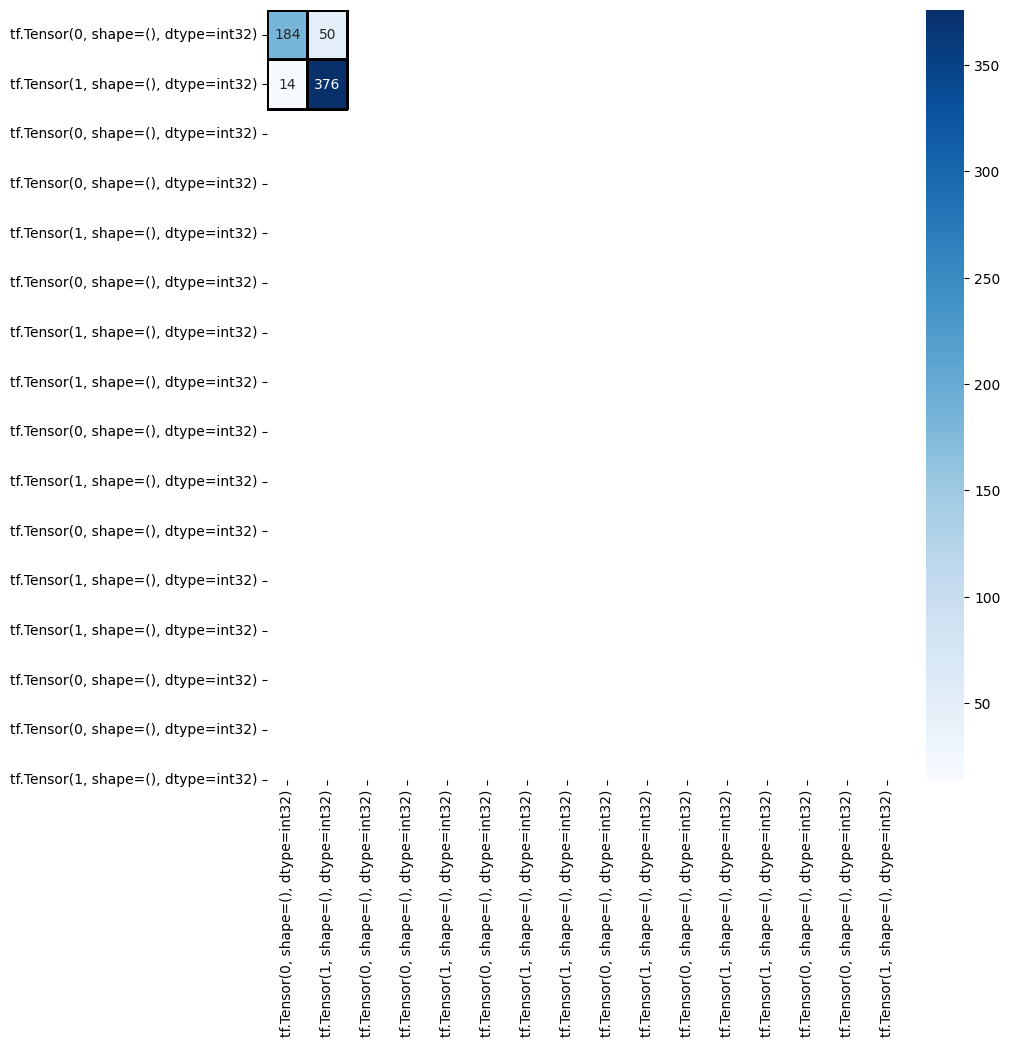

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)